<a href="https://colab.research.google.com/github/lauraholv/NLP_project/blob/main/Embedding_layer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
from datasets import load_dataset

dataset_original = load_dataset('glue', 'sst2')
train_dataset_original = dataset_original['train']
test_dataset_original = dataset_original['validation']
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
import numpy as np
def load_glove_embeddings(path):
    with open(path,'r') as f:
        word_to_vec = {}
        for line in f:
            line = line.split()
            word = line[0]
            vec = np.array([float(val) for val in line[1:]])
            word_to_vec[word] = vec
    return word_to_vec

glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 11.9 MB/s eta 0:00:00


Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

--2023-06-17 16:44:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-17 16:44:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-17 16:44:10--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [2]:
copy_train_dataset_original = train_dataset_original
copy_test_dataset_original = test_dataset_original

print(f"Number of total training examples: {len(copy_train_dataset_original)}")
print(f"Number of total test examples: {len(copy_test_dataset_original)}")

num_samples = len(copy_train_dataset_original)
val_fraction = (num_samples - 50000) / num_samples
dataset_trainval = copy_train_dataset_original.train_test_split(test_size=val_fraction, seed=42)

train_data = dataset_trainval['train']
valid_data = dataset_trainval['test']
test_data = copy_test_dataset_original

print(f'Train dataset length: {len(train_data)}')
print(f'Validation dataset length: {len(valid_data)}')
print(f"Dataset features: {train_data.features}")

print("\nFirst 5 examples from the training set:")
for i in range(5):
    print(f"Example {i+1}: {train_data[i]}")
print("\nFirst 5 examples from the validation set:")
for i in range(5):
    print(f"Example {i+1}: {valid_data[i]}")

Number of total training examples: 67349
Number of total test examples: 872
Train dataset length: 50000
Validation dataset length: 17349
Dataset features: {'sentence': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'positive'], id=None), 'idx': Value(dtype='int32', id=None)}

First 5 examples from the training set:
Example 1: {'sentence': 'hurt ', 'label': 0, 'idx': 61396}
Example 2: {'sentence': 'action man cliché ', 'label': 0, 'idx': 37454}
Example 3: {'sentence': 'are rich veins of funny stuff in this movie ', 'label': 1, 'idx': 59223}
Example 4: {'sentence': "'s a stale , overused cocktail using the same olives since 1962 as garnish . ", 'label': 0, 'idx': 35754}
Example 5: {'sentence': 'any actor of talent would ever work in a mcculloch production again if they looked at how this movie turned out ', 'label': 0, 'idx': 34085}

First 5 examples from the validation set:
Example 1: {'sentence': 'klein , charming in comedies like american pie and dead-on in ele

In [3]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize

def sentence_to_embedding(sentence, embeddings):
    tokens = word_tokenize(sentence)
    vectors = [torch.from_numpy(embeddings[token]) for token in tokens if token in embeddings]

    if vectors:
        tensor = torch.stack(vectors)
    else:
        tensor = torch.zeros((1, 100))

    return tensor

class SentenceDataset(Dataset):
    def __init__(self, data, embeddings):
        self.sentences = data['sentence']
        self.labels = data['label']
        self.embeddings = embeddings

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        label = self.labels[idx]
        tensor = sentence_to_embedding(sentence, self.embeddings)
        return tensor, label

train_dataset = SentenceDataset(train_data, glove_embeddings)
valid_dataset = SentenceDataset(valid_data, glove_embeddings)
test_dataset = SentenceDataset(test_data, glove_embeddings)

def collate_fn(batch):
    tensors, labels = zip(*batch)
    tensors = nn.utils.rnn.pad_sequence(tensors, batch_first=True)
    labels = torch.tensor(labels, dtype=torch.long)
    return tensors, labels


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, collate_fn=collate_fn)

In [4]:
import torch.nn as nn
import torch.nn.functional as F
class SentimentClassifier(nn.Module):
    def __init__(self, embedding_dim, n_filters, filter_sizes, output_dim):
        super().__init__()

        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim,
                      out_channels=n_filters,
                      kernel_size=fs)
            for fs in filter_sizes
        ])

        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)

    def forward(self, x):

        x = x.permute(0, 2, 1)


        conved = [F.relu(conv(x)) for conv in self.convs]


        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]


        cat = self.fc(torch.cat(pooled, dim=1))


        return cat
model = SentimentClassifier(100, 100,[1, 2, 3],2)

In [5]:
import nltk
nltk.download('punkt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


learning_rate = 0.001
num_epochs = 15


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device).float()
        targets = targets.to(device=device).long()


        scores = model(data)
        loss = criterion(scores, targets)



        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device).float()
            y = y.to(device=device).long()

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    return num_correct/num_samples

print(f'Accuracy on validation data before adversarial attack: {check_accuracy(valid_loader, model)*100:.2f}')
print(f'Accuracy on test data before adversarial attack: {check_accuracy(test_loader, model)*100:.2f}')

Accuracy on validation data before adversarial attack: 91.72
Accuracy on test data before adversarial attack: 80.85


In [7]:
from torch.utils.data import DataLoader, TensorDataset
def create_adversarial_example(input_tensor, target_tensor, model, epsilon=0.01):
    input_tensor.requires_grad = True

    scores = model(input_tensor.unsqueeze(0))
    loss = criterion(scores, target_tensor)

    model.zero_grad()
    loss.backward()

    input_grad = input_tensor.grad.data
    adversarial_example = input_tensor + epsilon * input_grad.sign()
    adversarial_example = torch.clamp(adversarial_example, 0, 1)

    perturbations = (adversarial_example - input_tensor).abs() > epsilon
    positions = perturbations.nonzero(as_tuple=True)[0]

    return adversarial_example.detach(), positions
def create_adversarial_dataset(dataset, model, max_len, epsilon=0.01):
    adversarial_examples = []
    labels = []
    all_positions = []

    for input_tensor, target in dataset:
        input_tensor = input_tensor.to(device=device).float()
        target_tensor = torch.tensor([target], device=device)


        if input_tensor.size(0) < max_len:
            padding_size = max_len - input_tensor.size(0)
            padding = torch.zeros(padding_size, input_tensor.size(1), device=device)
            input_tensor = torch.cat([input_tensor, padding])

        adversarial_example, positions = create_adversarial_example(input_tensor, target_tensor, model, epsilon)
        adversarial_examples.append(adversarial_example)
        labels.append(target_tensor)
        all_positions.extend(positions.tolist())
    return adversarial_examples, labels, all_positions


max_len = 200

adversarial_examples_val, labels_val,pos_val = create_adversarial_dataset(valid_dataset, model, max_len)
adversarial_examples_test, labels_test,pos_test = create_adversarial_dataset(test_dataset, model, max_len)

adversarial_valid_dataset = TensorDataset(torch.stack(adversarial_examples_val), torch.cat(labels_val))
adversarial_valid_loader = DataLoader(adversarial_valid_dataset, batch_size=128)

adversarial_test_dataset = TensorDataset(torch.stack(adversarial_examples_test), torch.cat(labels_test))
adversarial_test_loader = DataLoader(adversarial_test_dataset, batch_size=128)

def check_accuracy_adv(loader, model):
    num_correct = 0
    num_samples = 0
    softmax = torch.nn.Softmax(dim=1)
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device).float()
            y = y.to(device=device).long()

            scores = model(x)
            predictions = torch.max(softmax(scores), dim=1)[1]
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)


    model.train()
    return num_correct / num_samples

print(f'Accuracy on adversarial test data: {check_accuracy_adv(adversarial_valid_loader, model)*100:.2f}')
print(f'Accuracy on adversarial test data: {check_accuracy_adv(adversarial_test_loader, model)*100:.2f}')


Accuracy on adversarial test data: 61.88
Accuracy on adversarial test data: 52.64


In [8]:
acc_val = check_accuracy(valid_loader, model)
acc_test = check_accuracy(test_loader, model)
acc_val_adv = check_accuracy_adv(adversarial_valid_loader, model)
acc_test_adv = check_accuracy_adv(adversarial_test_loader, model)
perc_drop_val = (acc_val-acc_val_adv)/acc_val
perc_drop_test = (acc_test-acc_test_adv)/acc_test

In [9]:
print(acc_val*100)
print(acc_test*100)
print(acc_val_adv*100)
print(acc_test_adv*100)
print(perc_drop_val*100)
print(perc_drop_test*100)

tensor(91.7171)
tensor(80.8486)
tensor(61.8768)
tensor(52.6376)
tensor(32.5352)
tensor(34.8936)


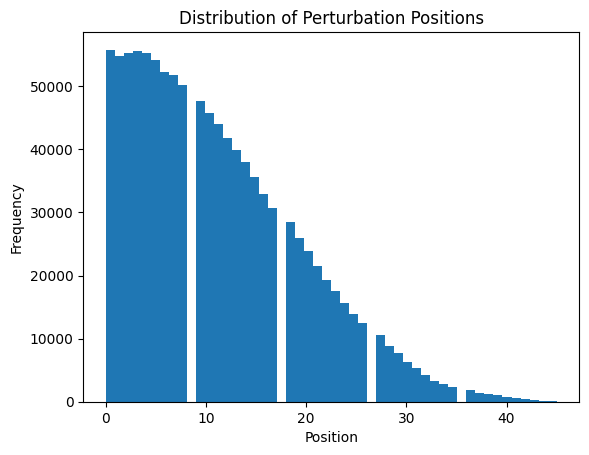

In [10]:
import matplotlib.pyplot as plt


all_positions = pos_val + pos_test


plt.hist(pos_test, bins=50)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Distribution of Perturbation Positions')
plt.show()



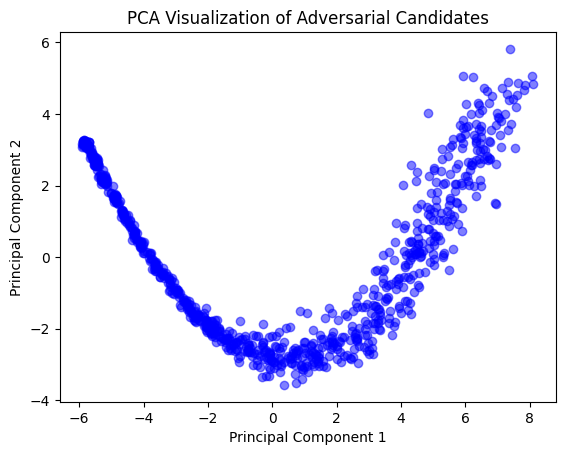

In [11]:
from sklearn.decomposition import PCA
import numpy as np


all_adversarial_examples = adversarial_examples_test


adversarial_examples_np = [example.flatten().cpu().numpy() for example in all_adversarial_examples]
adversarial_examples_np = np.array(adversarial_examples_np)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(adversarial_examples_np)

plt.scatter(principal_components[:, 0], principal_components[:, 1], color='b', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Adversarial Candidates')
plt.show()


Explained variance ratio: [0.12966485 0.03846195]


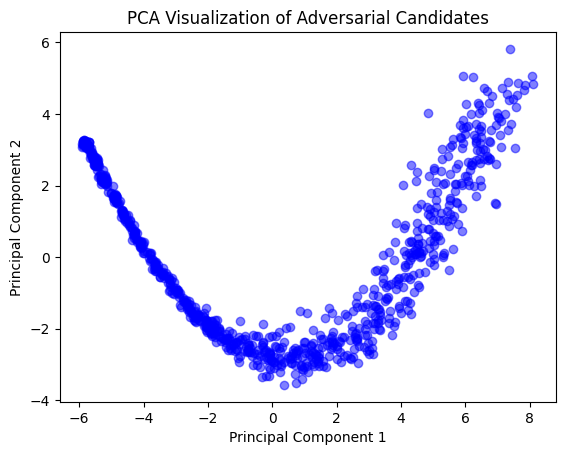

In [12]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(adversarial_examples_np)


print('Explained variance ratio:', pca.explained_variance_ratio_)


plt.scatter(principal_components[:, 0], principal_components[:, 1], color='b', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Adversarial Candidates')
plt.show()


Cumulative explained variance:
PC1: 12.97%
PC2: 16.81%


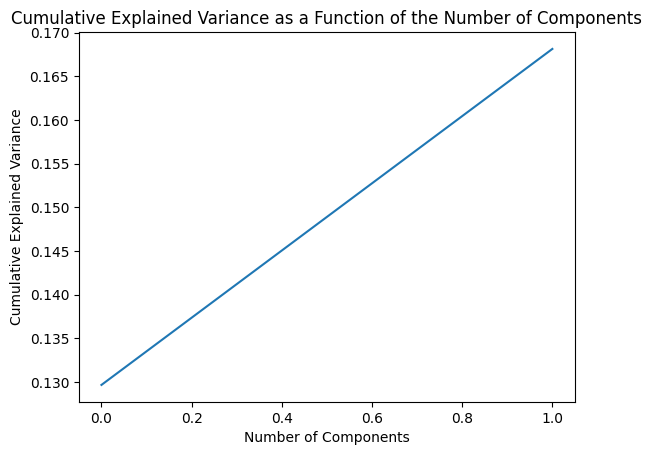

In [13]:

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)


print("Cumulative explained variance:")
for i, cumulative_variance in enumerate(cumulative_explained_variance):
    print(f"PC{i+1}: {cumulative_variance * 100:.2f}%")


plt.figure()
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.show()


Cumulative explained variance:
PC1: 12.97%
PC2: 16.81%
PC3: 18.74%
PC4: 19.97%
PC5: 20.97%
PC6: 21.91%
PC7: 22.79%
PC8: 23.66%
PC9: 24.51%
PC10: 25.28%


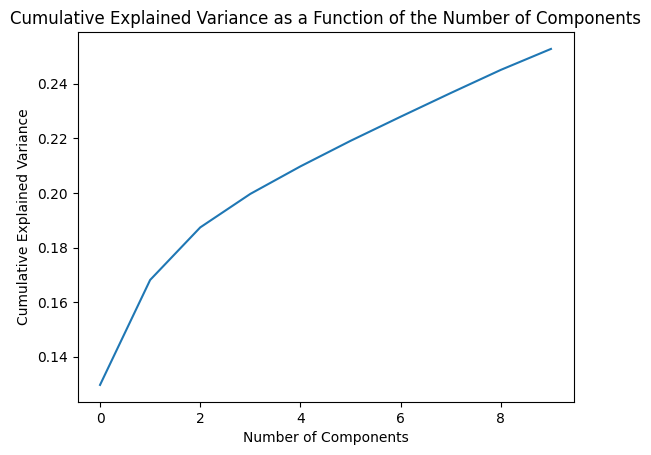

In [14]:

pca_more_components = PCA(n_components=10)
principal_components_more = pca_more_components.fit_transform(adversarial_examples_np)

cumulative_explained_variance_more = np.cumsum(pca_more_components.explained_variance_ratio_)


print("Cumulative explained variance:")
for i, cumulative_variance in enumerate(cumulative_explained_variance_more):
    print(f"PC{i+1}: {cumulative_variance * 100:.2f}%")


plt.figure()
plt.plot(cumulative_explained_variance_more)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.show()


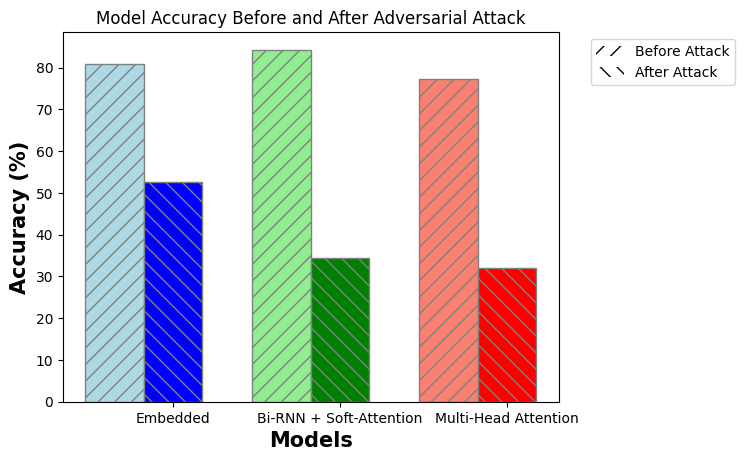

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


models = ['Embedded', 'Bi-RNN + Soft-Attention', 'Multi-Head Attention']


accuracy_before = [80.85, 84.29, 77.18]


accuracy_after = [52.64, 34.52, 31.94]


bar_width = 0.35


r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]


bars_before = plt.bar(r1, accuracy_before, color=['lightblue', 'lightgreen', 'salmon'], width=bar_width, edgecolor='grey', hatch='//')
bars_after = plt.bar(r2, accuracy_after, color=['blue', 'green', 'red'], width=bar_width, edgecolor='grey', hatch='\\\\')


plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Accuracy (%)', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(models))], models)

plt.title('Model Accuracy Before and After Adversarial Attack')


legend_before = mpatches.Patch(facecolor='white', hatch='//', label='Before Attack')
legend_after = mpatches.Patch(facecolor='white', hatch='\\\\', label='After Attack')
plt.legend(handles=[legend_before, legend_after], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
